## Business Problem
*   How can insurance companies retain existing policy-holders while optimizing cost?
*   Which other market segments should the Insurance company target

## Dataset

*   The data allows investigation into the factors that affect the amount that an individual spends on health insurance. For insurance companies, the cost of cover usually relates to the risk associated with a payout and the amount they would be liable to pay in the event of a payout. For health insurance specifically, the risk is likely to be higher if an individual is more likely to require medical assistance i.e. they are in worse overall health. In terms of the payout, companies often offer levels of cover based on the quality of care a patient would recieve in the event they require medical attention.

*   https://www.kaggle.com/datasets/mirichoi0218/insurance



Features
1.   age: age of primary beneficiary
2.   sex: insurance contractor gender, female, maleList item
3.   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4.   children: Number of children covered by health insurance / Number of dependents
5.   smoker: Smoking
6.   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7.   charges: Individual medical costs billed by health insurance

In [7]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


# instantiate model and Standard Scaler
LinearReg = LinearRegression()
scale = StandardScaler()

# set figure parameters
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=2)

In [9]:
insurance_df = pd.read_csv(r'C:\Users\user\Desktop\insurance.csv') #loading the csv file as a dataframe
print(insurance_df) # take a look at the dataframe
print(insurance_df.dtypes) # there are floats and also integers and objects
print(insurance_df.isna().sum()) #there are no missing data

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
age         0
sex

Text(0.5, 1.0, 'Distribution of charges')

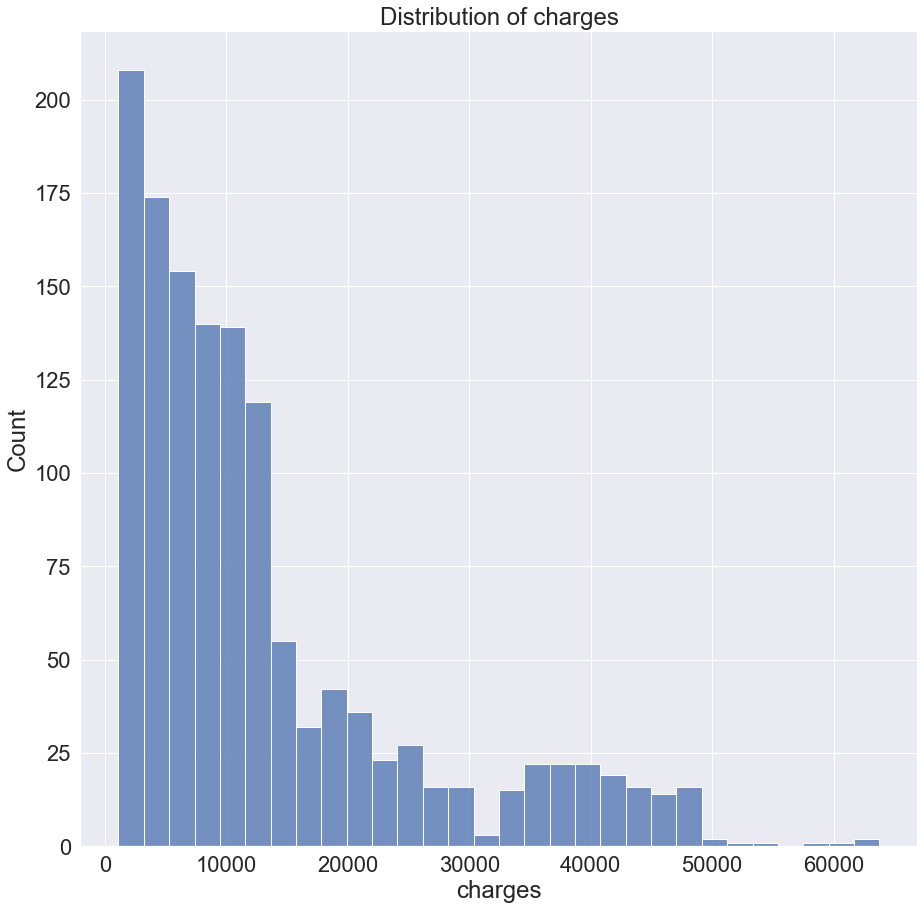

In [10]:
# Dependent variables is charges (continuous)
sns.histplot(x='charges', data= insurance_df) #trying to see the distribution of the dependent variable
plt.title('Distribution of charges')

Text(0.5, 1.0, 'Charges vs Age')

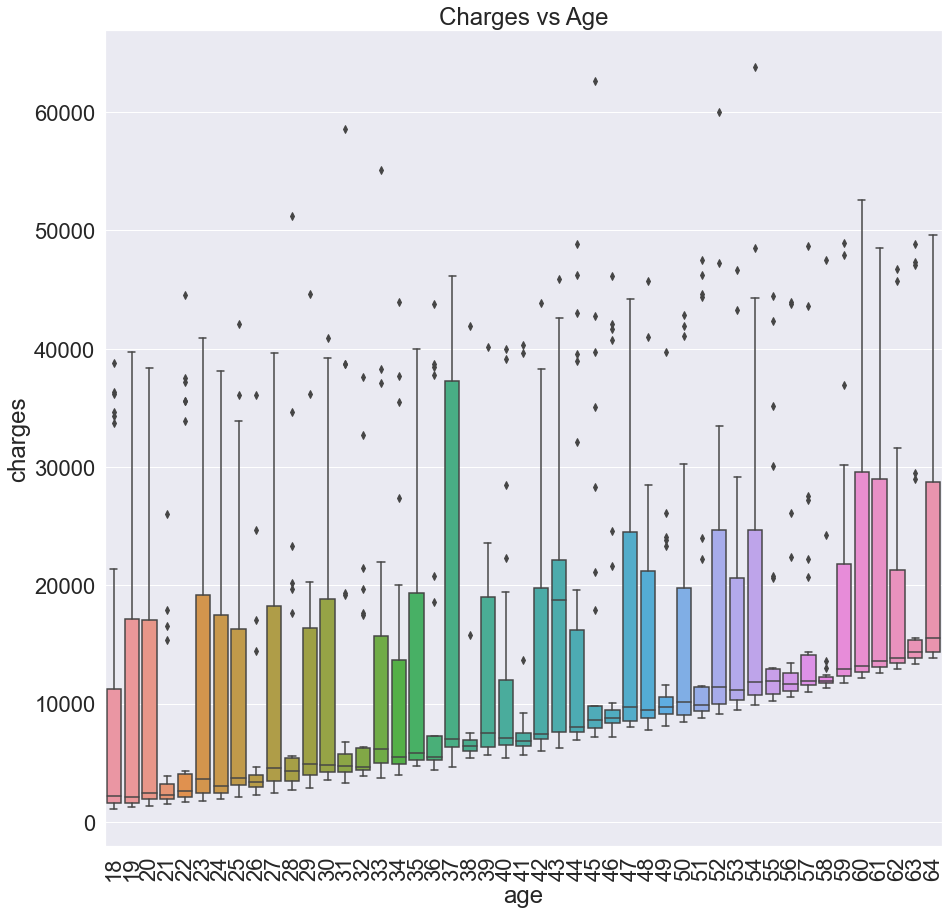

In [11]:
#Exploratory Data Analysis
sns.boxplot(x='age', y='charges',  data=insurance_df) #Age does increase charges but its not the only factor given the existence of outliers across different ages
plt.xticks(rotation=90)
plt.title('Charges vs Age')


In [12]:
insurance_cat = pd.get_dummies(columns=['sex','smoker','region'], drop_first=True, data= insurance_df) #creating dummy variables for the discrete X variables. Drop first to ensure no multi collinearity
print(insurance_cat.head(5)) #print out dataframe to see if the changes is what we want

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [13]:
insurance_cat.corr() #create a large correlation table to see if there is any correlation between variables

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [14]:
insurance_cat.value_counts()

age  bmi     children  charges      sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
19   30.590  0         1639.56310   1         0           1                 0                 0                   2
18   15.960  0         1694.79640   1         0           0                 0                 0                   1
47   36.190  0         41676.08110  1         1           0                 1                 0                   1
48   24.420  0         21223.67580  1         1           0                 1                 0                   1
     22.800  0         8269.04400   0         0           0                 0                 1                   1
                                                                                                                 ..
31   23.600  2         4931.64700   0         0           0                 0                 1                   1
     21.755  0         4134.08245   0         0           1                 0

Text(0.5, 1.0, 'Correlation of Independent Variables to Hospital Charges')

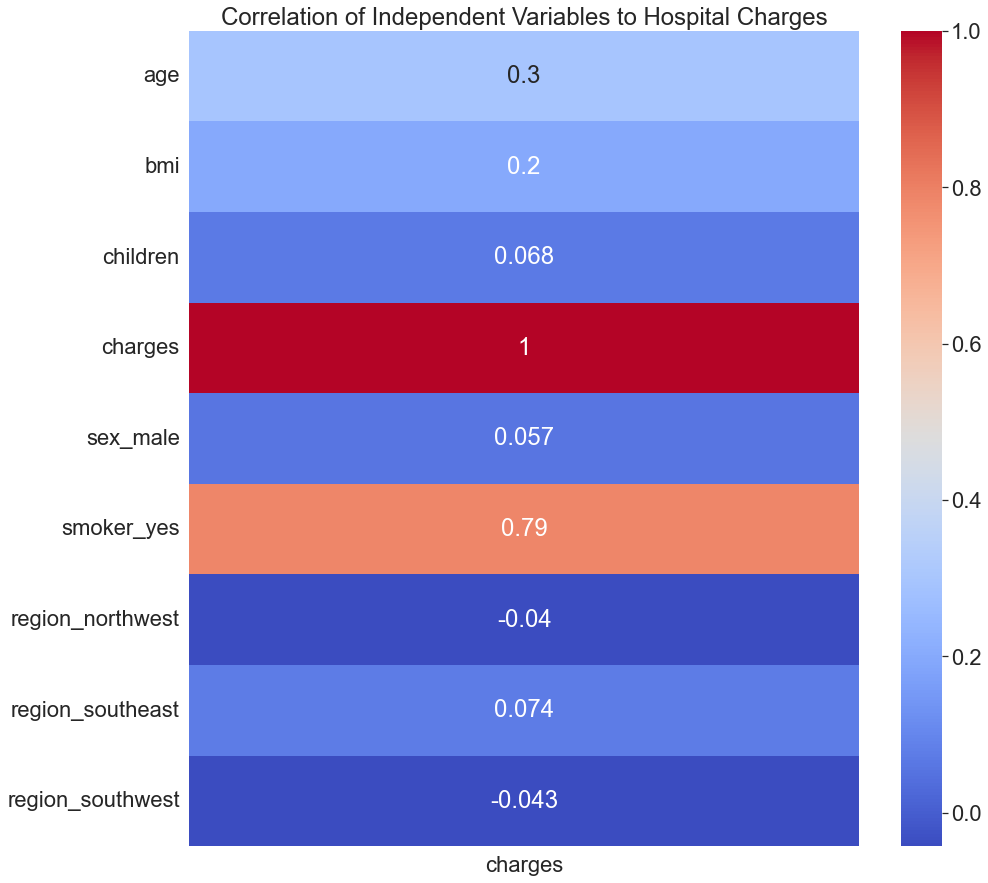

In [15]:
sns.heatmap(insurance_cat.corr()[['charges']], annot=True, cmap='coolwarm') #drill down to the correlation to charges, the dependent variable and use seaborn for visualization
plt.title('Correlation of Independent Variables to Hospital Charges')

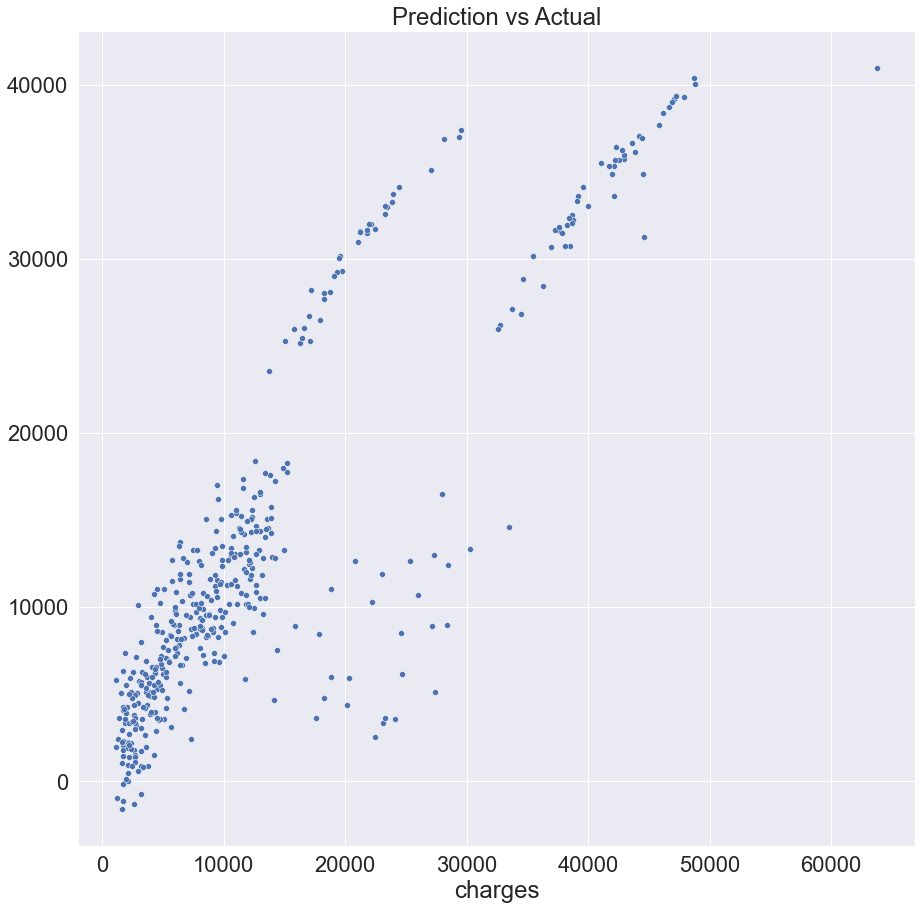

|    | Model    |   Train Score |   Test Score |   CV Score |
|---:|:---------|--------------:|-------------:|-----------:|
|  0 | Baseline |          0.75 |         0.76 |       0.73 |
           Features      Co-effs
6  region_southeast  -386.679531
7  region_southwest  -341.092613
5  region_northwest  -147.494158
3          sex_male    60.543585
2          children   447.826224
1               bmi  2075.883455
0               age  3715.374433
4        smoker_yes  9650.590947


Text(0.5, 1.0, 'Baseline Model: Feature Importance')

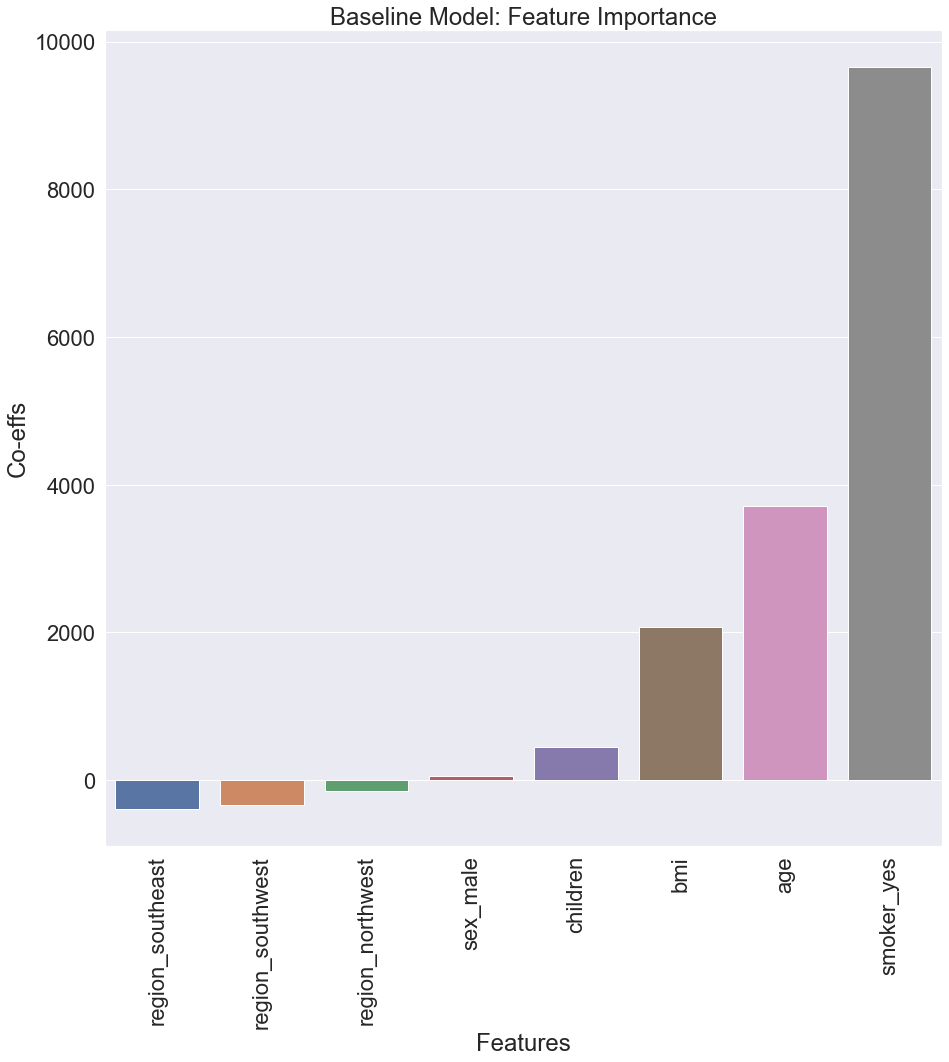

In [16]:
#Base line 

Y_baseline = insurance_cat['charges'] #baseline y variable
X_col = [x for x in insurance_cat if x != 'charges'] #using list comprehension to get a list of x variables
X_baseline = insurance_cat[X_col] #creating the dataframe for x variables
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_baseline,Y_baseline, test_size=0.33, random_state=42) #Train test split the baseline dataset

X_train_base_sc = scale.fit_transform(X_train_base) #scaling the train data
X_test_base_sc = scale.transform(X_test_base) #scaling the test data
LinearReg.fit(X_train_base_sc,y_train_base) #fitting the train data to the linear regressor


# Scatterplot of Predicted vs actual values'

y_pred_base = LinearReg.predict(X_test_base_sc) #predicting y using X_test and model parameters
sns.scatterplot(y= y_pred_base, x = y_test_base) #scatterplot for prediction vs actual
plt.title('Prediction vs Actual') #set title
plt.show() #show plot


#creating a table to see results
model_result = pd.DataFrame({'Model':'Baseline', 'Train Score': [LinearReg.score(X_train_base_sc,y_train_base)],'Test Score': [LinearReg.score(X_test_base_sc,y_test_base)], 'CV Score': [cross_val_score(LinearReg, X_train_base_sc,y_train_base).mean()]})
model_result.set_index('Model').T #transpose the dataframe and set index name to 'model'
model_result = np.round(model_result, decimals=2) #set to 2 decimal for better viewing

print(model_result.to_markdown()) #create border around the table for easy viewing


#Generating the feature importance plot

coefs = pd.DataFrame(zip(X_baseline.columns, LinearReg.coef_), columns=['Features','Co-effs']) #putting coefs in a dataframe
coefs_sorted =coefs.sort_values(by='Co-effs',ascending=True) #sort the coefficients
print(coefs_sorted) #print table
sns.barplot(data=coefs_sorted, x="Features", y="Co-effs") #plot the sorted dataframe
plt.xticks(rotation=90) #rotate the ticks
plt.title('Baseline Model: Feature Importance') #set a title




In [17]:
#ML model with feature engineering

poly = PolynomialFeatures(include_bias=False) #instantiate the polynomial function
X_poly = poly.fit_transform(X_baseline) #fit and transform the original X baseline dataframe
X_poly = pd.DataFrame(X_poly,columns=poly.get_feature_names(X_baseline.columns)) #create a new dataframe with feature names from the original X_baseline
print(X_poly.head(5)) #print to see if the dataframe is what we expected.

    age     bmi  children  sex_male  smoker_yes  region_northwest  \
0  19.0  27.900       0.0       0.0         1.0               0.0   
1  18.0  33.770       1.0       1.0         0.0               0.0   
2  28.0  33.000       3.0       1.0         0.0               0.0   
3  33.0  22.705       0.0       1.0         0.0               1.0   
4  32.0  28.880       0.0       1.0         0.0               1.0   

   region_southeast  region_southwest   age^2  age bmi  ...  smoker_yes^2  \
0               0.0               1.0   361.0  530.100  ...           1.0   
1               1.0               0.0   324.0  607.860  ...           0.0   
2               1.0               0.0   784.0  924.000  ...           0.0   
3               0.0               0.0  1089.0  749.265  ...           0.0   
4               0.0               0.0  1024.0  924.160  ...           0.0   

   smoker_yes region_northwest  smoker_yes region_southeast  \
0                          0.0                          0.0

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

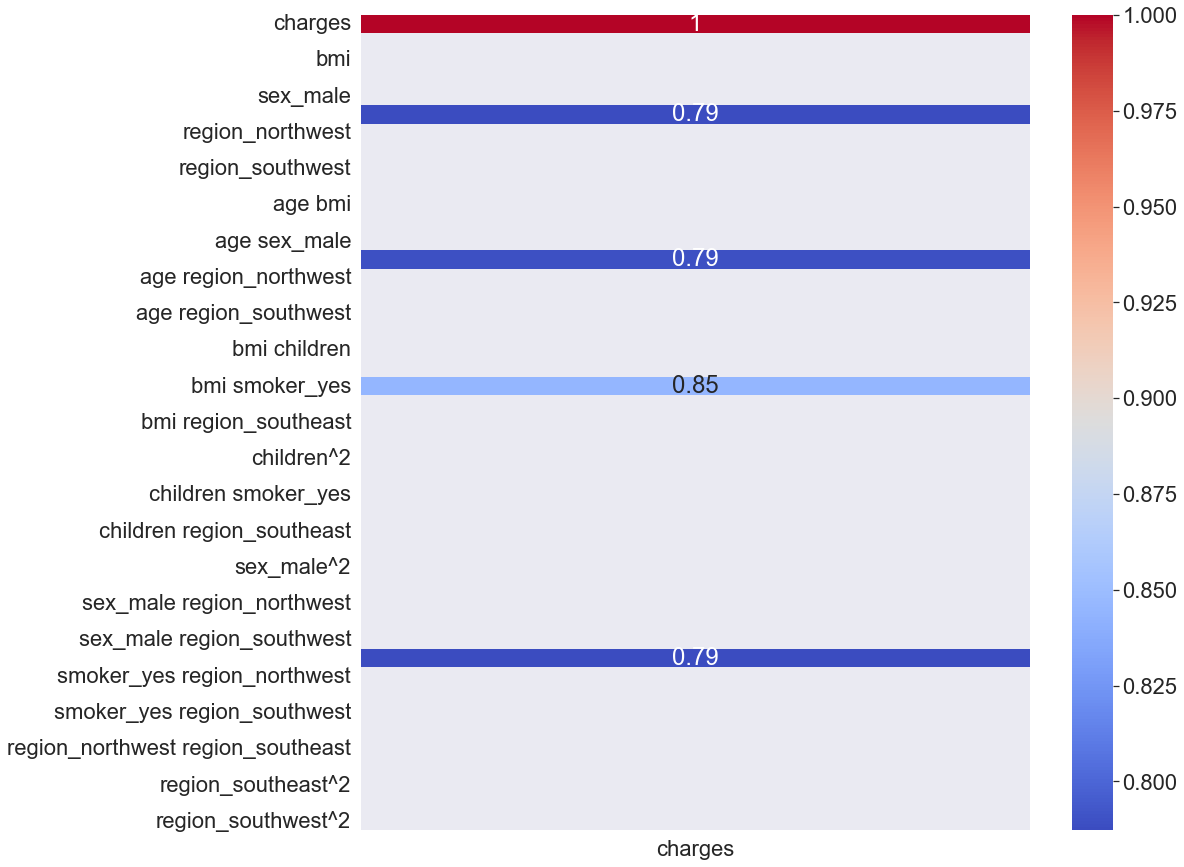

In [18]:
corr_df = pd.concat([Y_baseline, X_poly], axis=1) #reattached the y_baseline so that we can do a correlation plot
sns.heatmap(corr_df.corr()[['charges']][corr_df.corr()[['charges']]>0.7], annot=True, cmap='coolwarm') #extended correlation plot using all the engineered features

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


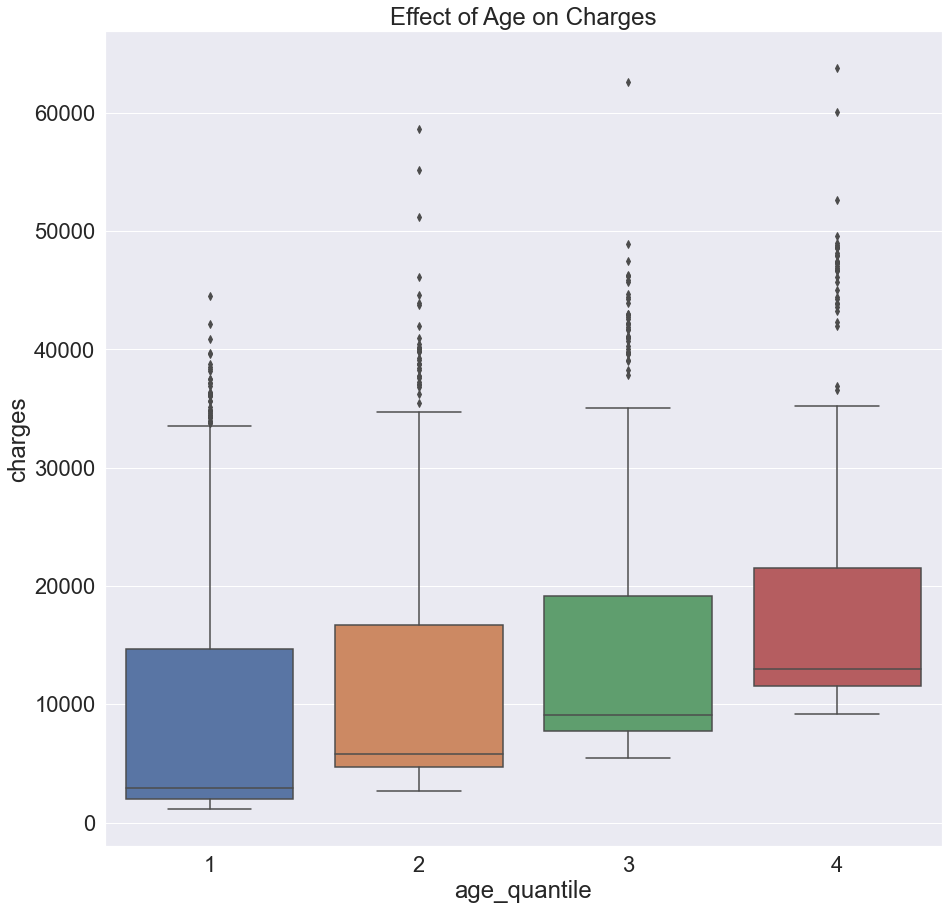

In [19]:
corr_df['age_quantile'] = pd.qcut(corr_df['age'], 4, #cutting the bmi into 4 quantiles for visualization purposes
                               labels = [1,2,3,4])
sns.boxplot(x='age_quantile', y='charges', data= corr_df).set_title('Effect of Age on Charges') #creating a boxplot

print(corr_df['age'].describe()) #using describe to know where the quantile cut offs will be. 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


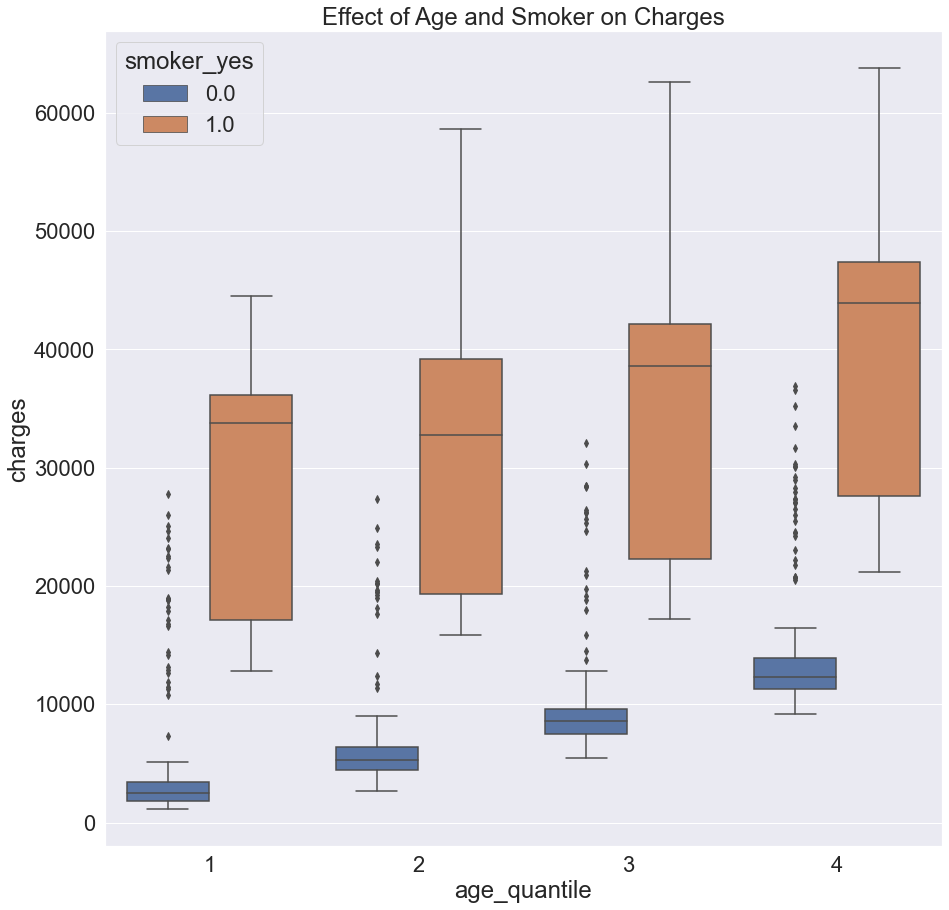

In [20]:
corr_df['age_quantile'] = pd.qcut(corr_df['age'], 4, #cutting the bmi into 4 quantiles for visualization purposes
                               labels = [1,2,3,4])
sns.boxplot(x='age_quantile', y='charges', hue='smoker_yes', data= corr_df).set_title('Effect of Age and Smoker on Charges') #creating a boxplot

print(corr_df['age'].describe()) #using describe to know where the quantile cut offs will be. 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


Text(0.5, 1.0, 'Effects of Smoking and BMI on Charges')

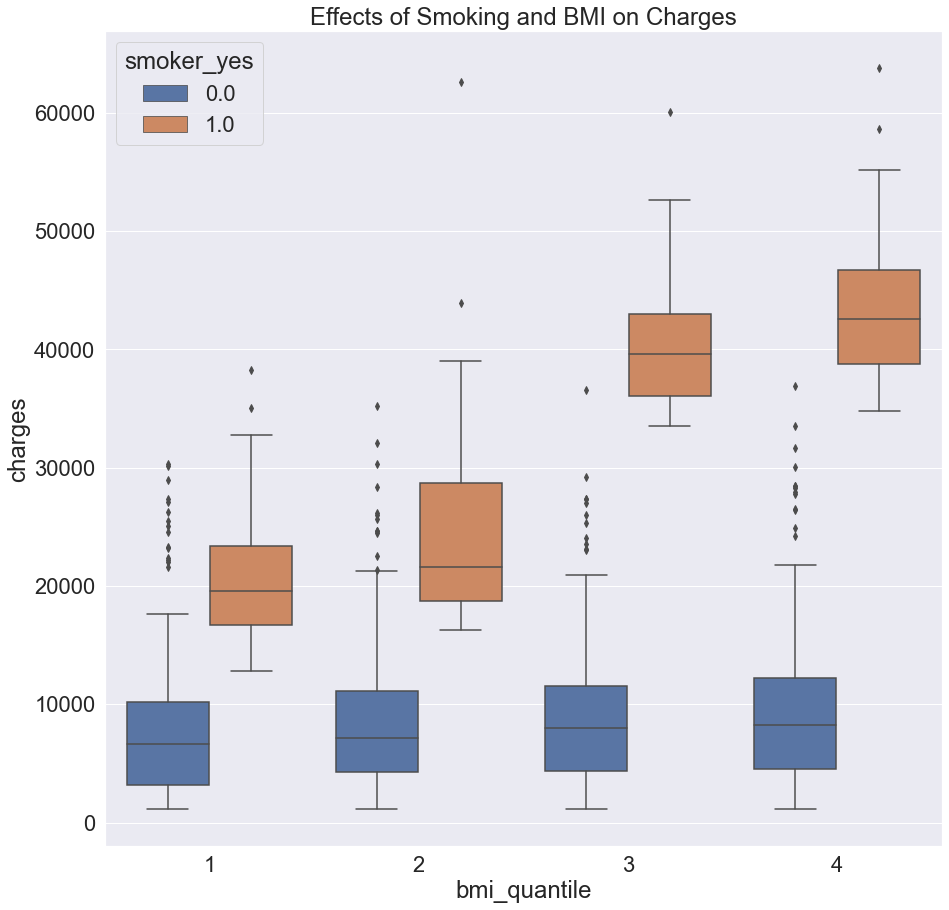

In [21]:
# Same as above
print(corr_df['bmi'].describe())
corr_df['bmi_quantile'] = pd.qcut(corr_df['bmi'], 4,
                               labels = ['1','2','3','4'])
sns.boxplot(x='bmi_quantile', y='charges', hue='smoker_yes', data= corr_df)
plt.title('Effects of Smoking and BMI on Charges')

Text(0.5, 1.0, 'Effects of Age and BMI on Charges')

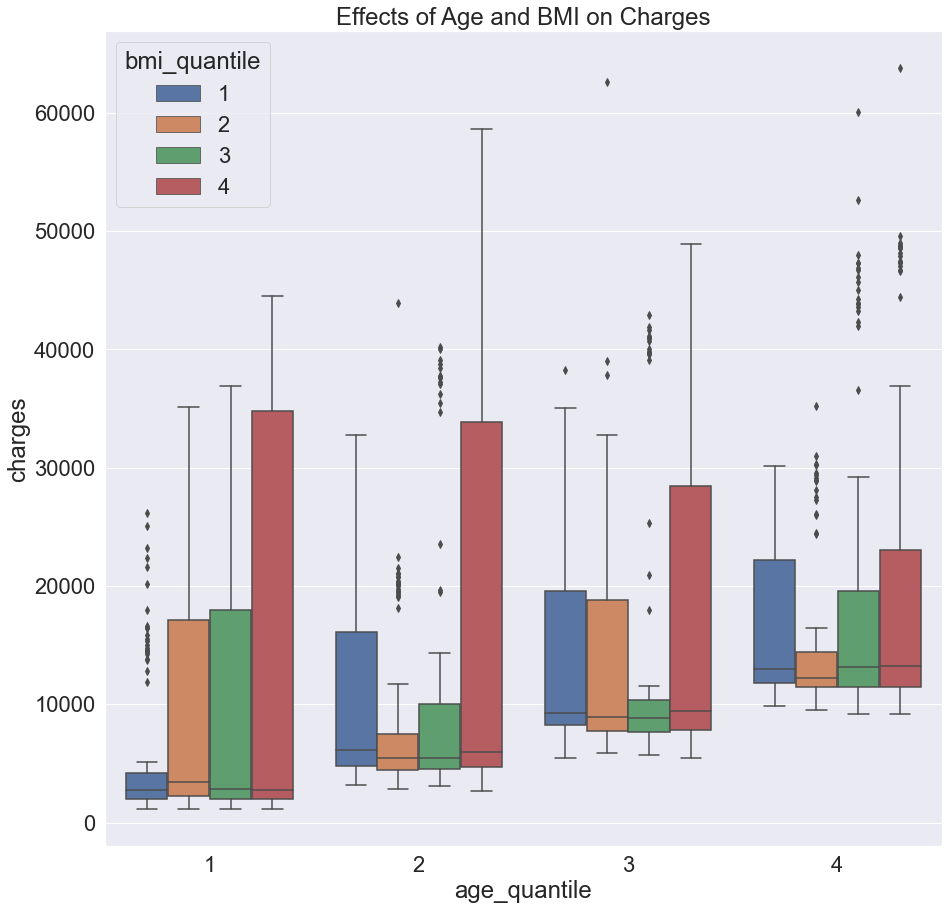

In [22]:
corr_df['bmi_quantile'] = pd.qcut(corr_df['bmi'], 4, 
                               labels = ['1','2','3','4']) 
corr_df['age_quantile'] = pd.qcut(corr_df['age'], 4,  
                               labels = ['1','2','3','4']) 
sns.boxplot(x='age_quantile', y='charges', hue='bmi_quantile', data= corr_df) 
plt.title('Effects of Age and BMI on Charges')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y_baseline, test_size = 0.33, random_state=42) #train test split for ML model with full features

X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

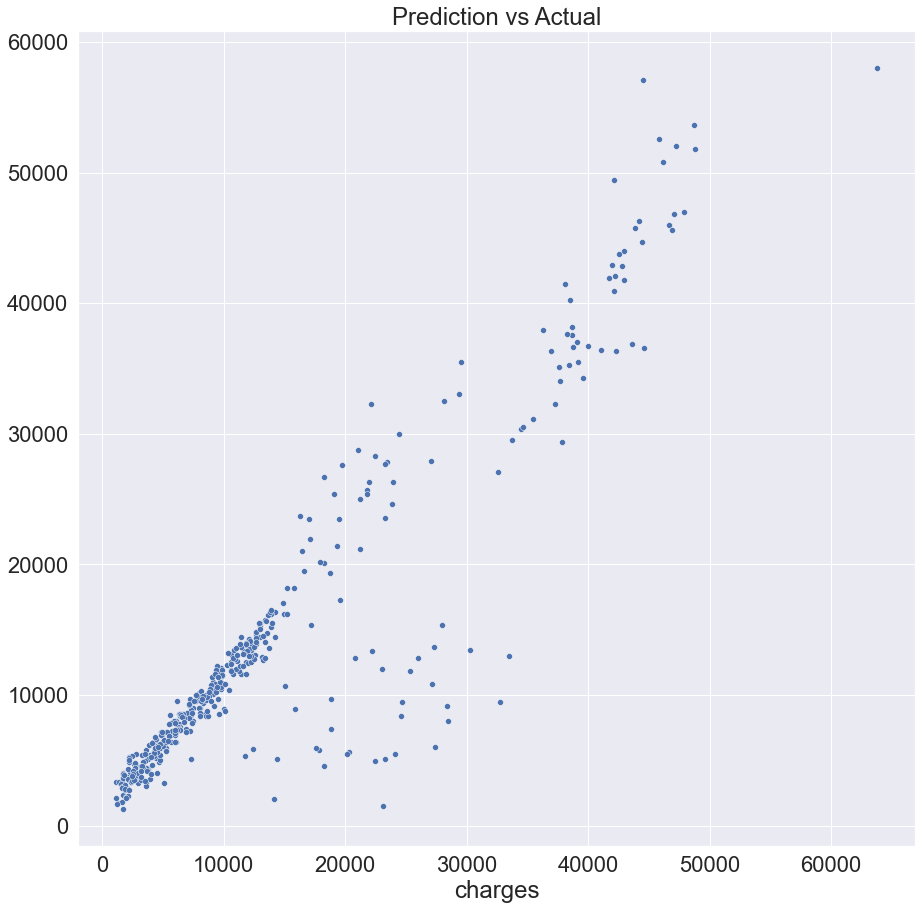

Index(['Model', 'Train Score', 'Test Score', 'CV Score'], dtype='object')
|    | Model    |   Train Score |   Test Score |   CV Score |
|---:|:---------|--------------:|-------------:|-----------:|
|  0 | ML Model |          0.84 |         0.85 |       0.82 |
(44, 2)
|    | Features                          |    Co-effs |
|---:|:----------------------------------|-----------:|
| 34 | smoker_yes^2                      | -4241.29   |
|  4 | smoker_yes                        | -4241.29   |
| 16 | bmi^2                             | -2338.75   |
| 21 | bmi region_southeast              | -1739.93   |
| 22 | bmi region_southwest              | -1680.92   |
|  0 | age                               | -1599.76   |
| 29 | sex_male^2                        |  -654.474  |
|  3 | sex_male                          |  -654.474  |
| 20 | bmi region_northwest              |  -449.607  |
| 28 | children region_southwest         |  -360.839  |
| 25 | children smoker_yes               |  -301.713  |
| 38

Text(0.5, 1.0, 'ML Model: Feature Importance')

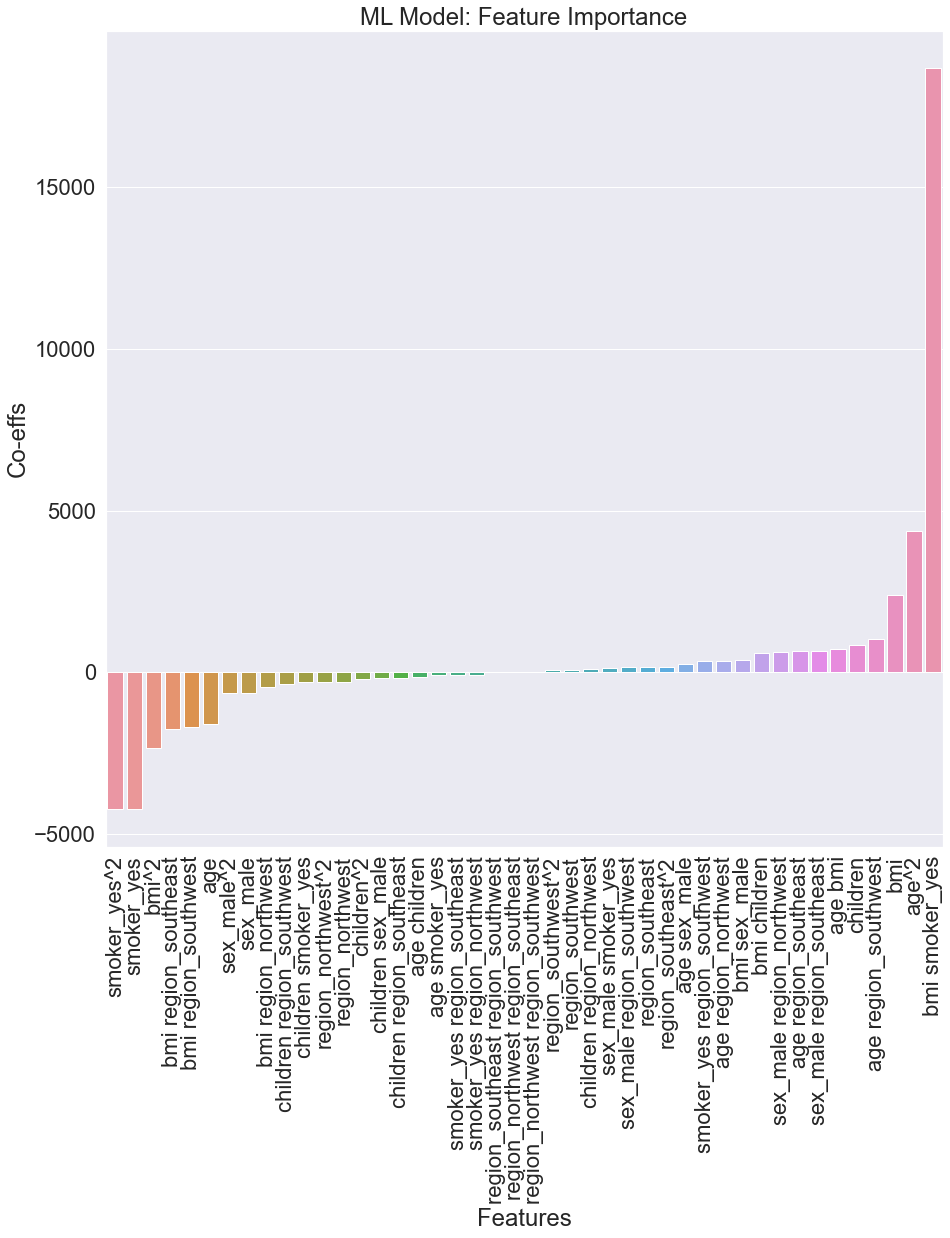

In [24]:
LinearReg.fit(X_train_sc, y_train) #fitting model to train data
r2_train = LinearReg.score(X_train_sc, y_train) # score for train data
r2_test = LinearReg.score(X_test_sc, y_test) #score for test data. 

y_pred = LinearReg.predict(X_test_sc) #predicted values

sns.scatterplot(y= y_pred, x = y_test) #scatter of predicted vs actual
plt.title('Prediction vs Actual')
plt.show()

#Creating table with all the relevant scores

model_result = pd.DataFrame({'Model':'ML Model', 'Train Score': [LinearReg.score(X_train_sc,y_train)],'Test Score': [LinearReg.score(X_test_sc,y_test)], 'CV Score': [cross_val_score(LinearReg, X_train_sc,y_train).mean()]})
model_result.set_index('Model').T
model_result = np.round(model_result, decimals=2)
print(model_result.columns)
print(model_result.to_markdown())

coefs = pd.DataFrame(zip(X_poly.columns, LinearReg.coef_), columns=['Features','Co-effs'])
coefs_sorted =coefs.sort_values(by='Co-effs',ascending=True)
print(coefs_sorted.shape)
print(coefs_sorted.to_markdown())

#creating a barplot with sorted feature coefficients.
sns.barplot(data=coefs_sorted, x="Features", y="Co-effs")
plt.xticks(rotation=90)
plt.title('ML Model: Feature Importance')


0.842143762350587
0.8514631315752411
                             Features       Co-effs
34                       smoker_yes^2  -7974.797162
16                              bmi^2  -1166.875600
21               bmi region_southeast  -1120.263384
22               bmi region_southwest  -1056.315150
5                    region_northwest   -468.176375
28          children region_southwest   -333.627711
29                         sex_male^2   -316.836330
3                            sex_male   -301.185177
25                children smoker_yes   -270.479342
38                 region_northwest^2   -139.292407
24                  children sex_male   -127.554498
27          children region_southeast    -73.566190
35        smoker_yes region_northwest    -64.730260
12                     age smoker_yes    -39.294711
4                          smoker_yes    -33.552314
36        smoker_yes region_southeast    -18.639647
39  region_northwest region_southeast      0.000000
40  region_northwest region

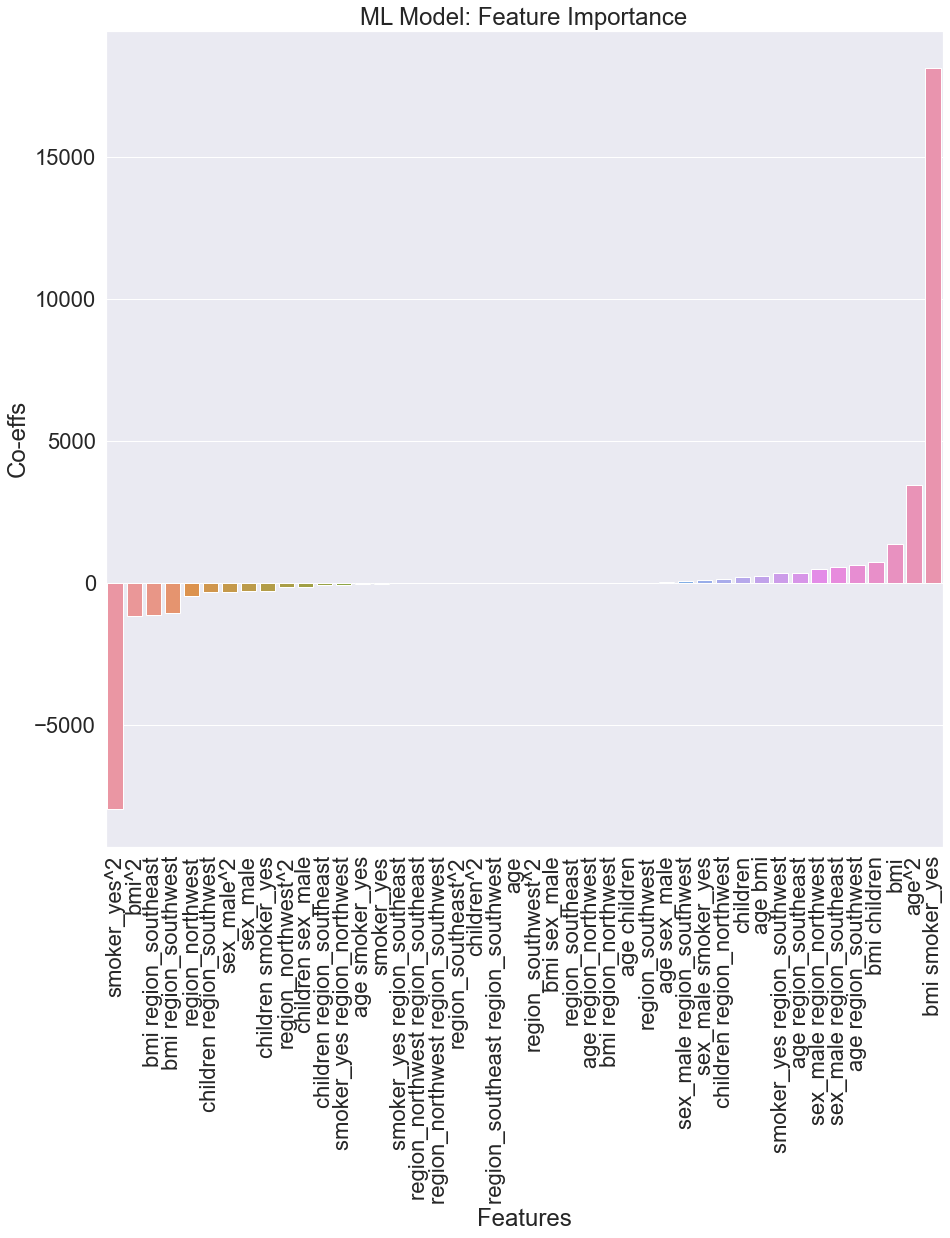

                       Features       Co-effs
1                           bmi   1386.972550
2                      children    210.499997
3                      sex_male   -301.185177
4                    smoker_yes    -33.552314
5              region_northwest   -468.176375
8                         age^2   3451.317884
9                       age bmi    229.313138
11                 age sex_male     25.947064
12               age smoker_yes    -39.294711
14         age region_southeast    358.901152
15         age region_southwest    633.860363
16                        bmi^2  -1166.875600
17                 bmi children    737.597195
19               bmi smoker_yes  18118.280939
21         bmi region_southeast  -1120.263384
22         bmi region_southwest  -1056.315150
24            children sex_male   -127.554498
25          children smoker_yes   -270.479342
26    children region_northwest    130.215029
27    children region_southeast    -73.566190
28    children region_southwest   

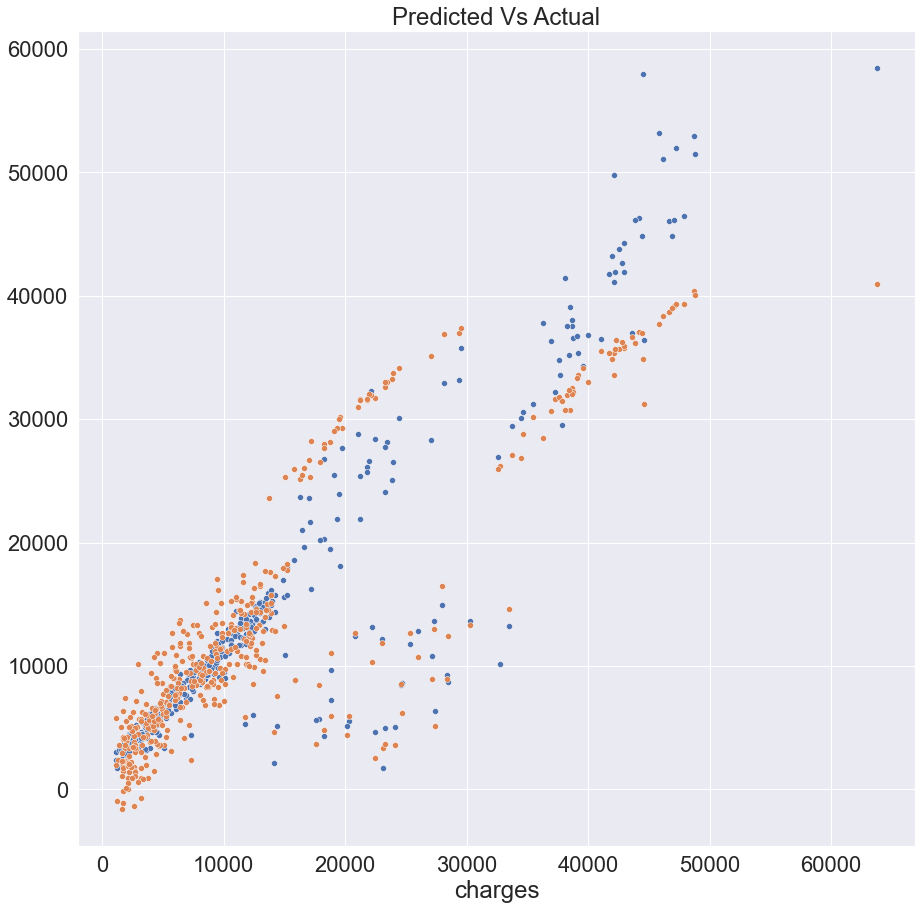

Index(['Model', 'Train Score', 'Test Score'], dtype='object')
|    | Model                  |   Train Score |   Test Score |
|---:|:-----------------------|--------------:|-------------:|
|  0 | ML Model (Regularised) |          0.84 |         0.85 |


<Figure size 1080x1080 with 0 Axes>

In [25]:
l_alphas = np.logspace(-3,1,100)  #creating a set of alphas to test
 
# Cross-validate over our list of Lasso alphas.

lasso_cv = LassoCV (alphas=l_alphas, cv = 5, max_iter=4000) #testing for the best alpha
 
# Fit model using best Lasso alpha! 
X_train_sc = scale.fit_transform(X_train) #scale the train data
X_test_sc = scale.transform(X_test) #scale the test data
lasso_cv.fit(X_train_sc,y_train) #fitting the model
lasso_cv.alpha_

print(lasso_cv.score(X_train_sc, y_train)) #train score
print(lasso_cv.score(X_test_sc, y_test)) #test score


coefs = pd.DataFrame(zip(X_poly.columns, lasso_cv.coef_), columns=['Features','Co-effs'])
coefs_sorted =coefs.sort_values(by='Co-effs',ascending=True)
print(coefs_sorted)
sns.barplot(data=coefs_sorted, x="Features", y="Co-effs") #getting feature importance plot
plt.xticks(rotation=90)
plt.title('ML Model: Feature Importance')
plt.show()

lasso_label = coefs[coefs['Co-effs'] != 0] #getting a dataframe of all the features which are non zeros
print(lasso_label)
print(lasso_label.shape) #finding out how many factors are left

y_pred = lasso_cv.predict(X_test_sc)
sns.scatterplot(y= y_pred, x = y_test) #creating a predicted vs actual plot
sns.scatterplot(y= y_pred_base, x=y_test_base)
plt.title('Predicted Vs Actual')
plt.show()
plt.tight_layout()

# Consolidating all results in a table for viewing
model_result = pd.DataFrame({'Model':'ML Model (Regularised)', 'Train Score': [lasso_cv.score(X_train_sc,y_train)],'Test Score': [lasso_cv.score(X_test_sc,y_test)]})
model_result.set_index('Model').T
model_result = np.round(model_result, decimals=2)
print(model_result.columns)
print(model_result.to_markdown())


### Implementing other models to improve fit

##### SVM

In [67]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train_sc, y_train)
y_pred = regressor.predict(X_test_sc)
r2_score(y_test,y_pred)

0.28332303999734043

##### RandomForest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor as RFR

RandomForest = RFR(max_depth=5, random_state=42)
RandomForest.fit(X_train_sc, y_train)
y_pred = RandomForest.predict(X_test_sc)
y_train_pred = RandomForest.predict(X_train_sc)
print(r2_score(y_train, y_train_pred),r2_score(y_test,y_pred))

0.8915775476706882 0.861869320647914


##### ANN

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from sklearn.metrics import r2_score

In [59]:
classifier = Sequential()

In [60]:
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(units=15,activation='relu'))
classifier.add(Dense(units=1,activation='relu'))
classifier.compile(optimizer = 'adam', loss='mean_squared_error')

In [61]:
model_history=classifier.fit(X_train_sc,y_train,validation_split=0.33, batch_size=10 , epochs=50)

Epoch 1/50
60/60 [==============================] - 1s 6ms/step - loss: 327129024.0000 - val_loss: 322059424.0000
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 326961760.0000 - val_loss: 321817728.0000
Epoch 3/50
60/60 [==============================] - 0s 3ms/step - loss: 326478400.0000 - val_loss: 321144448.0000
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 325246496.0000 - val_loss: 319678016.0000
Epoch 5/50
60/60 [==============================] - 0s 3ms/step - loss: 322836160.0000 - val_loss: 316946240.0000
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 318793440.0000 - val_loss: 312744544.0000
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 312828928.0000 - val_loss: 306665408.0000
Epoch 8/50
60/60 [==============================] - 0s 3ms/step - loss: 304626496.0000 - val_loss: 298679168.0000
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 294165568.0000 -

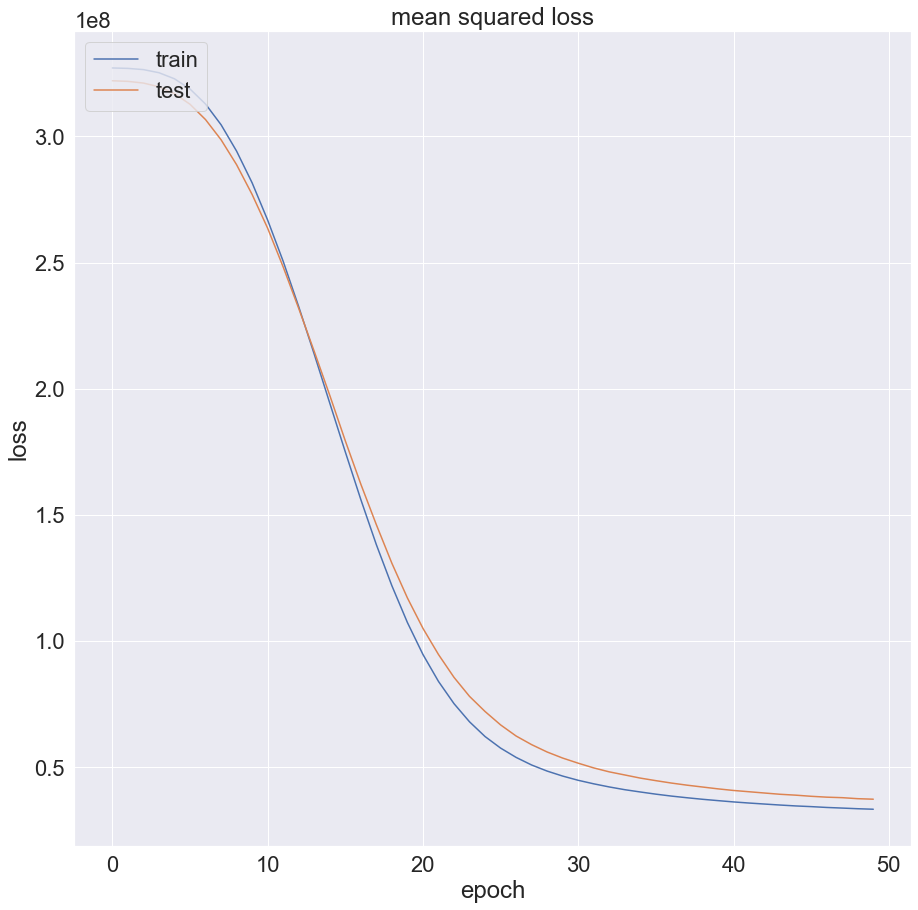

In [62]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('mean squared loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [63]:
y_pred = classifier.predict(X_test_sc)

14/14 [==============================] - 0s 1ms/step


In [64]:
r2_score(y_test,y_pred)

0.7776828249728706

Scenarios

In [ ]:
# getting model predictions for a set of hypothetical profiles. 

age = [30,50,30,30]
bmi = [20, 20,20,35]
children = [0,0,0,0]
sex_male = [1,1,1,1]
smoker_yes = [1,1,0,1]
region_northwest = [1,1,1,1]
region_southeast = [0,0,0,0]
region_southwest = [0,0,0,0]

test = pd.DataFrame(zip(age,bmi,children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest), columns = X_baseline.columns)
test_poly = poly.transform(test) #using the same poly features to transform the hypothetical data
test_sc = scale.transform(test_poly) #using the same standard scaler to transform the hypothetical data
y_pred = lasso_cv.predict(test_sc) #using lasso parameters to predict charges
print(y_pred)

[13125.70642209 18137.46232069  4230.66885456 35703.92602167]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


0.00    18.00
0.25    26.00
0.50    39.00
0.75    50.75
1.00    64.00
Name: age, dtype: float64
1 Quartile (97, 45)
2 Quartile (99, 45)
3 Quartile (88, 45)
4 Quartile (91, 45)
                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean   -339.264720   144.522884   446.180553  -109.385322
std     229.650054   196.683568   186.189894   199.551104
min   -1051.386039  -518.252031  -148.867003  -754.112091
25%    -493.611978    15.558057   318.239159  -246.364652
50%    -329.630208   150.387868   457.153028  -104.665470
75%    -185.828360   279.247076   574.679582    29.436297
max     350.355632   702.210533  1067.415272   463.814051
0.00    16.815
0.25    26.315
0.50    30.590
0.75    35.175
1.00    52.580
Name: bmi, dtype: float64
1 Quartile (89, 45)
2 Quartile (98, 45)
3 Quartile (92, 45)
4 Quartile (83, 45)
                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean 

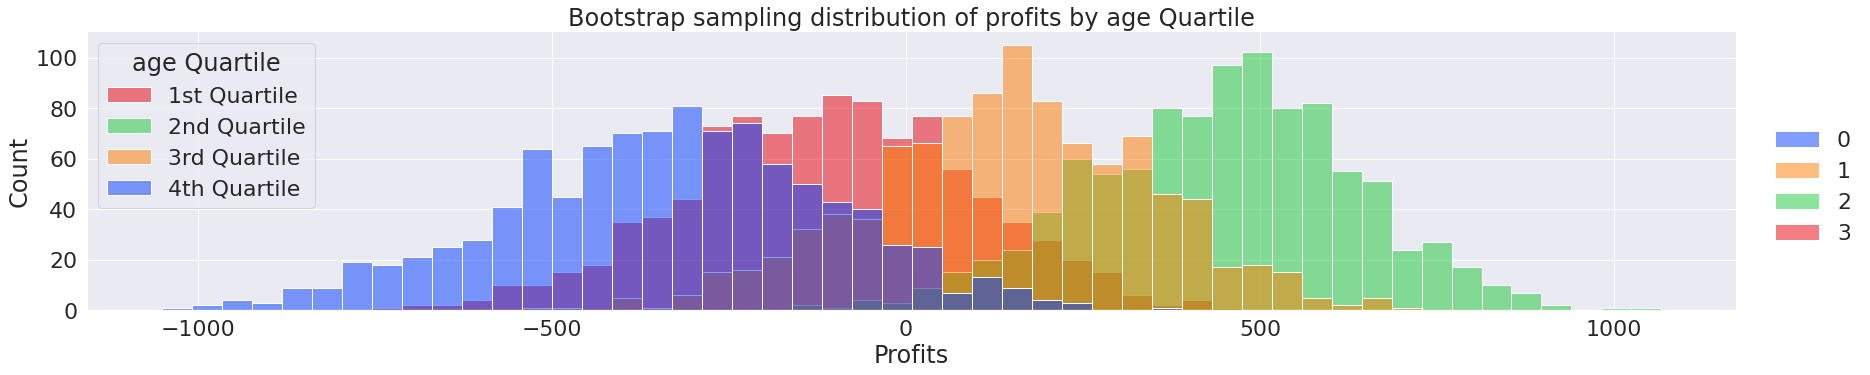

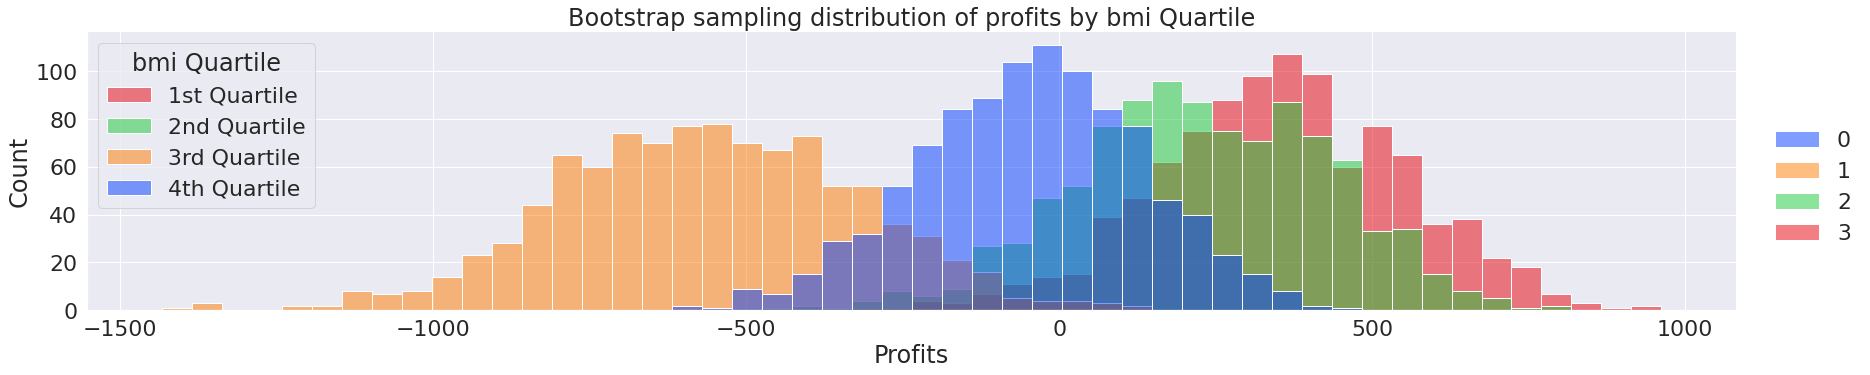

In [ ]:
def profit_bootstrap(x,y,z): #create a function to do bootstrapping 
  Test_Data = pd.concat([X_test, y_test], axis = 1) #combine the y test and x test data back
  Test_Quantile = Test_Data.quantile([0, .25, .5, .75,1], axis = 0) #cut the data into quartiles
  print(Test_Quantile[x]) #print out the values for the different quartiles
  profit = pd.DataFrame() #create empty dataframe
  for i in range(0,4):#iterate through the different quartiles
    test_old = Test_Data.loc[(Test_Data[x]>=Test_Quantile[x].iloc[i]) & (Test_Data[x]<=Test_Quantile[x].iloc[i+1])& (Test_Data[y]==z)] #filtering rules
    print(str(i+1)+' Quartile', test_old.shape) # check if the n observations in the different quartiles are roughly equal
    X_test_old = test_old.iloc[:,:-1] # resplit dataset into X_test and y_test
    y_test_old = test_old.iloc[:,-1] # resplit dataset into X_test and y_test
    y_pred_old = lasso_cv.predict(scale.transform(X_test_old)) #use model parameters to scale and predict expected premiums
    error_old = y_pred_old - y_test_old #error can also be seen as the profit if actual is the charge paid by the insurer and premiums is paid to the insurance
    bootstrap = [] #empty list
    for a in range(1000): #iterate through 1000 times
      a= (resample(error_old, n_samples=500, replace=True)).mean() #sample 500 times with replacement
      bootstrap.append(a) #append results to the empty list
    Boot_df = pd.DataFrame(bootstrap, columns = [i]) #convert into dataframe
    profit = pd.concat([profit,Boot_df], axis=1) #concat all the bootstraps data into the dataframe
  print(profit.describe()) #statistics for the different bootstraps
  sns.displot(profit,fill=True, palette=sns.color_palette('bright')[:4], height=5, aspect=5, bins=50) #distribution plot
  plt.legend(title= x +' Quartile', loc='upper left', labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']) #customise legend and title
  plt.title('Bootstrap sampling distribution of profits by ' + x +' Quartile')#customise legend and title
  plt.xlabel('Profits')

profit_bootstrap('age','smoker_yes',0)
profit_bootstrap('bmi','smoker_yes',0)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


<class 'pandas.core.frame.DataFrame'>
          Original  Hypothetical
count  1000.000000   1000.000000
mean    763.994119  25217.566349
std     227.875375    444.404397
min      72.550686  23716.507456
25%     613.175432  24915.233113
50%     762.719704  25230.006007
75%     919.716884  25526.273001
max    1436.771514  26804.959707


Text(0.5, 21.92, 'Profits')

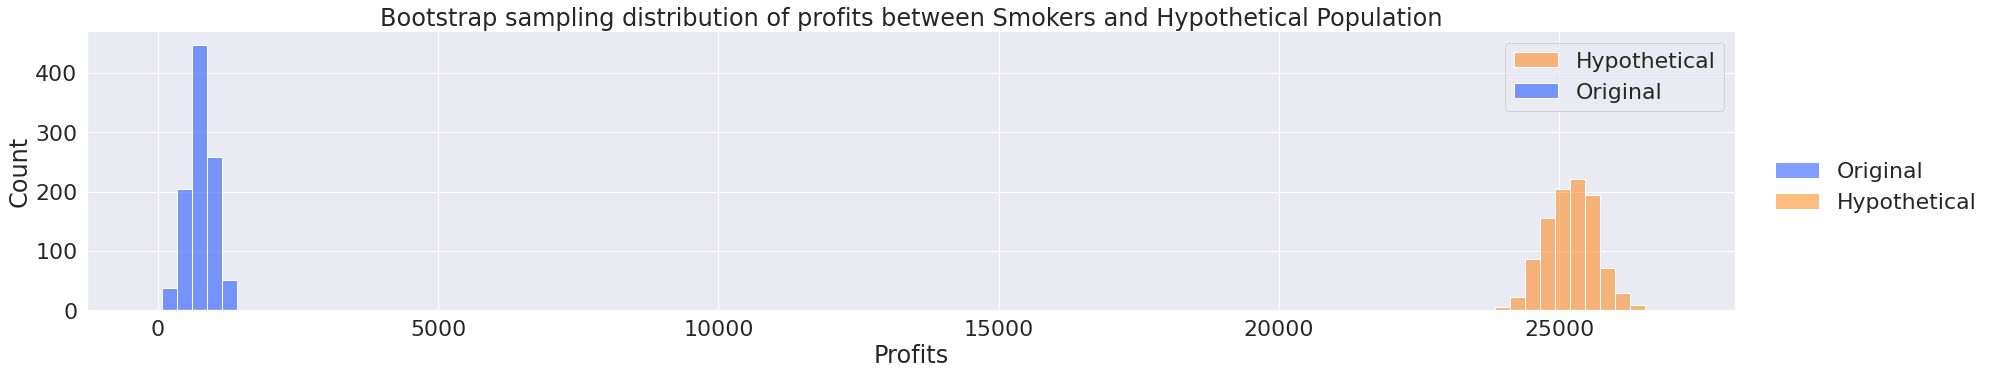

In [ ]:
# need to simply this into a function. 
Test_Data = pd.concat([X_test, y_test], axis = 1)
cost_cols = [col for col in Test_Data.columns if 'smoker' in col]
Test_Smoker = Test_Data[Test_Data['smoker_yes']==1]
Hypothetical_data = Test_Data[Test_Data['smoker_yes']==1]
Hypothetical_data[cost_cols] = 0
print(type(Hypothetical_data))
X_test_original = Test_Smoker.iloc[:,:-1]

Hypothetical_x = Hypothetical_data.iloc[:,:-1]

y_test_original = Test_Smoker.iloc[:,-1]
y_pred_original = lasso_cv.predict(scale.transform(X_test_original))
y_pred_hypothetical = lasso_cv.predict(scale.transform(Hypothetical_x))
error_original = y_pred_original - y_test_original
error_hypothetical = y_pred_original - y_pred_hypothetical
original = []
hypothetical =[]
cost = pd.DataFrame()
for a in range(1000):
    a= (resample(error_original, n_samples=500, replace=True)).mean()
    original.append(a)
    original_df = pd.DataFrame(original,columns=['Original'])
for b in range(1000):
    b= (resample(error_hypothetical, n_samples=500, replace=True)).mean()
    hypothetical.append(b)
    hypothetical_df = pd.DataFrame(hypothetical,columns=['Hypothetical'])
cost = pd.concat([cost,original_df,hypothetical_df], axis=1)
print(cost.describe())

sns.displot(cost,fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=5, bins=100)
plt.title('Bootstrap sampling distribution of profits between Smokers and Hypothetical Population')
plt.legend(labels=['Hypothetical','Original'])
plt.xlabel('Profits')

          Original  Hypothetical
count  1000.000000   1000.000000
mean    151.784115    631.717120
std     208.195577     41.377484
min    -507.662424    497.320267
25%       4.841903    603.303330
50%     158.094047    629.487424
75%     300.915178    659.920310
max     706.809987    759.038944


Text(0.5, 21.92, 'Profits')

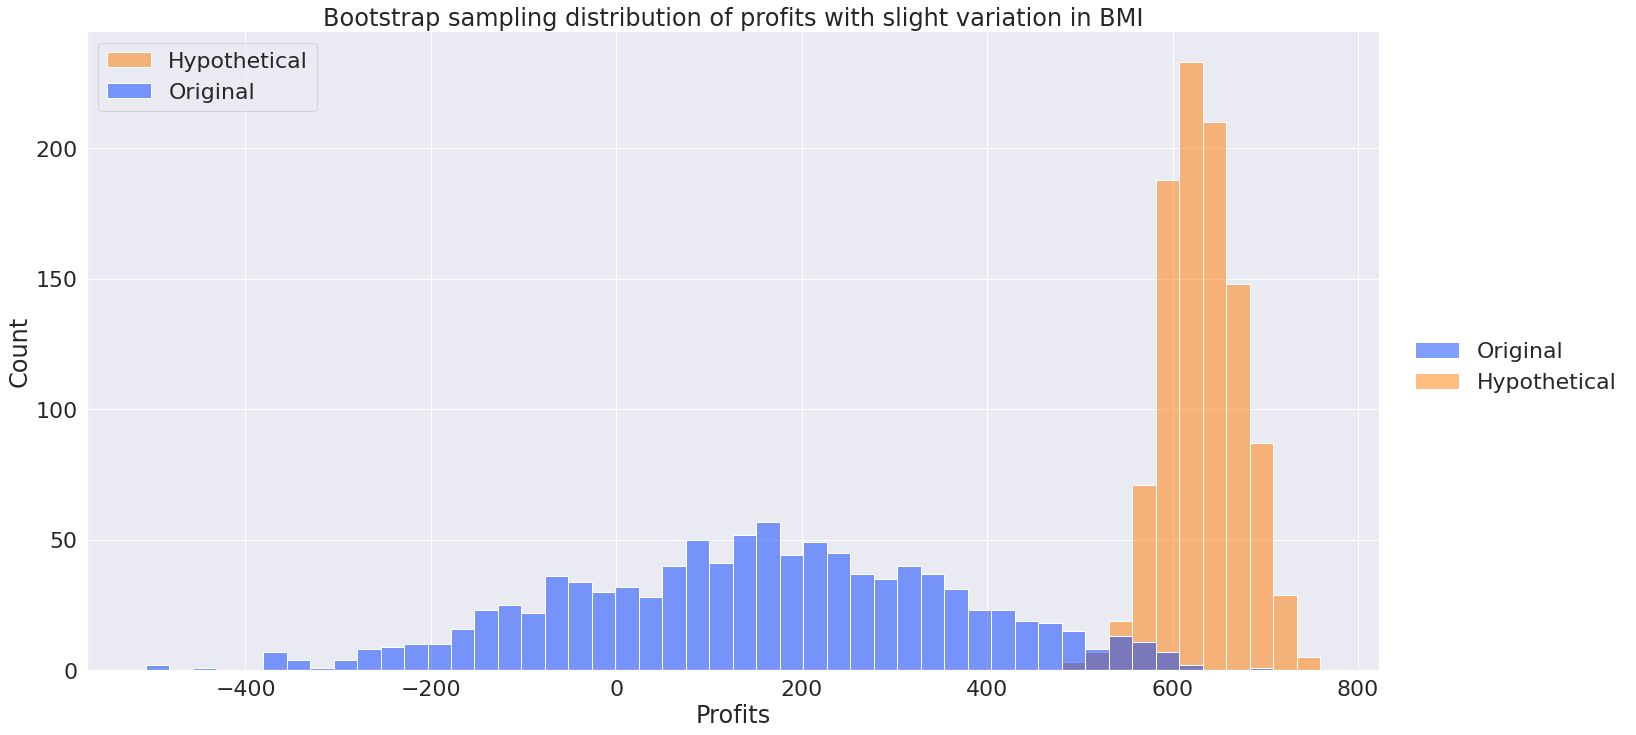

In [ ]:

Test_BMI = pd.concat([X_test, y_test], axis = 1)
BMI_cols = [col for col in Test_Data.columns if 'bmi' in col]

Hypothetical_BMI = Test_BMI.copy()
Hypothetical_BMI[BMI_cols] = Hypothetical_BMI[BMI_cols] * 0.95

X_test_original = Test_BMI.iloc[:,:-1]

Hypothetical_x = Hypothetical_BMI.iloc[:,:-1]

y_test_original = Test_BMI.iloc[:,-1]
y_pred_original = lasso_cv.predict(scale.transform(X_test_original))
y_pred_hypothetical = lasso_cv.predict(scale.transform(Hypothetical_x))
error_original = y_pred_original - y_test_original
error_hypothetical = y_pred_original - y_pred_hypothetical

original = []
hypothetical =[]
cost2 = pd.DataFrame()
for a in range(1000):
    a= (resample(error_original, n_samples=500, replace=True)).mean()
    original.append(a)
    original_df = pd.DataFrame(original,columns=['Original'])
for b in range(1000):
    b= (resample(error_hypothetical, n_samples=500, replace=True)).mean()
    hypothetical.append(b)
    hypothetical_df = pd.DataFrame(hypothetical,columns=['Hypothetical'])
cost2 = pd.concat([cost2,original_df,hypothetical_df], axis=1)
print(cost2.describe())

sns.displot(cost2,fill=True, palette=sns.color_palette('bright')[:2], height=10, aspect=2, bins=50)
plt.title('Bootstrap sampling distribution of profits with slight variation in BMI')
plt.legend(labels=['Hypothetical','Original'])
plt.xlabel('Profits')

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


NameError: ignored

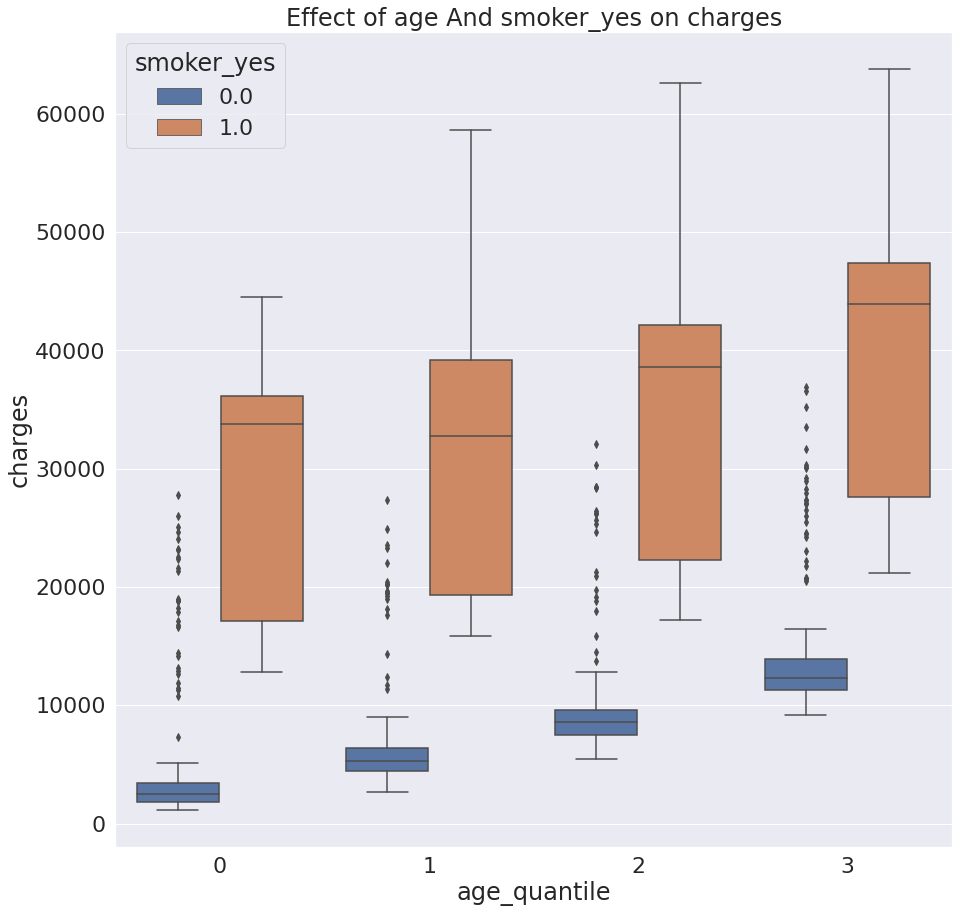

In [ ]:
# Appendix

def creating_plot(X,y,z,df): #function to create box plot
  X_extended = X + '_quantile'
  df[X_extended] = pd.qcut(df[X],4,labels=False)
  sns.boxplot(x=X_extended, y= y, hue=  z, data = df ).set_title('Effect of '+ X + ' And ' + z + ' on ' +y)
  print(df[X].describe())

creating_plot('age', 'charges', 'smoker_yes', corr_df)



#Creating a function to reduce the code needed for two fits. 
def fitting_model(model, X, y):
  Standard = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
  X_train_sc = Standard.fit_transform(X_train)
  X_test_sc = Standard.transform(X_test)
  model.fit(X_train, y_train)
  r2_train = model.score(X_train, y_train)
  r2_test = model.score(X_test, y_test)
  print(r2_train, r2_test)


fitting_model(LinearRegression(), X_original, Y_original) # original model
fitting_model(LinearRegression(), X_poly, Y) #poly fit model